In [1]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

Attribute Information:

instr: Instructor's identifier; values taken from {1,2,3}

class: Course code (descriptor); values taken from {1-13} 

repeat: Number of times the student is taking this course; values taken from {1,2,3,...} 

attendance: Code of the level of attendance; values from {0, 1, 2, 3, 4} 

difficulty: Level of difficulty of the course as perceived by the student; values taken from {1,2,3,4,5} 

Q1: The semester course content, teaching method and evaluation system were provided at the start. 

Q2: The course aims and objectives were clearly stated at the beginning of the period. 

Q3: The course was worth the amount of credit assigned to it. 

Q4: The course was taught according to the syllabus announced on the first day of class. 

Q5: The class discussions, homework assignments, applications and studies were satisfactory. 

Q6: The textbook and other courses resources were sufficient and up to date.	

Q7: The course allowed field work, applications, laboratory, discussion and other studies. 

Q8: The quizzes, assignments, projects and exams contributed to helping the learning.	

Q9: I greatly enjoyed the class and was eager to actively participate during the lectures. 

Q10: My initial expectations about the course were met at the end of the period or year. 

Q11: The course was relevant and beneficial to my professional development. 

Q12: The course helped me look at life and the world with a new perspective. 

Q13: The Instructor's knowledge was relevant and up to date. 

Q14: The Instructor came prepared for classes. 

Q15: The Instructor taught in accordance with the announced lesson plan. 

Q16: The Instructor was committed to the course and was understandable. 

Q17: The Instructor arrived on time for classes. 

Q18: The Instructor has a smooth and easy to follow delivery/speech. 

Q19: The Instructor made effective use of class hours. 

Q20: The Instructor explained the course and was eager to be helpful to students. 

Q21: The Instructor demonstrated a positive approach to students. 

Q22: The Instructor was open and respectful of the views of students about the course. 

Q23: The Instructor encouraged participation in the course. 

Q24: The Instructor gave relevant homework assignments/projects, and helped/guided students. 

Q25: The Instructor responded to questions about the course inside and outside of the course. 

Q26: The Instructor's evaluation system (midterm and final questions, projects, assignments, etc.) effectively measured the course objectives. 

Q27: The Instructor provided solutions to exams and discussed them with students. 

Q28: The Instructor treated all students in a right and objective manner. 

Q1-Q28 are all Likert-type, meaning that the values are taken from {1,2,3,4,5}

In [2]:
#import data
# data source: https://archive.ics.uci.edu/ml/datasets/Turkiye+Student+Evaluation

df = pd.read_csv('D:\\dataset\\7_studentEvaluation\\turkiye-student-evaluation_generic.csv')

df.head()

,instr,class,nb.repeat,attendance,difficulty,Q1,Q2,Q3,Q4,Q5,...,Q19,Q20,Q21,Q22,Q23,Q24,Q25,Q26,Q27,Q28
0,1,2,1,0,4,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
1,1,2,1,1,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
2,1,2,1,2,4,5,5,5,5,5,...,5,5,5,5,5,5,5,5,5,5
3,1,2,1,1,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
4,1,2,1,0,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


In [3]:
df.shape

(5820, 33)

In [4]:
df.isnull().sum()

instr         0
class         0
nb.repeat     0
attendance    0
difficulty    0
Q1            0
Q2            0
Q3            0
Q4            0
Q5            0
Q6            0
Q7            0
Q8            0
Q9            0
Q10           0
Q11           0
Q12           0
Q13           0
Q14           0
Q15           0
Q16           0
Q17           0
Q18           0
Q19           0
Q20           0
Q21           0
Q22           0
Q23           0
Q24           0
Q25           0
Q26           0
Q27           0
Q28           0
dtype: int64

In [5]:
sorted(df['instr'].unique().tolist())

[1, 2, 3]

In [30]:
sorted(df['nb.repeat'].unique().tolist())

[1, 2, 3]

In [6]:
df.groupby(['instr','nb.repeat'])['nb.repeat'].count()

# instr 1 has low number of student if the student repeat the class

instr  nb.repeat
1      1             705
       2              35
       3              35
2      1            1291
       2             126
       3              27
3      1            2913
       2             415
       3             273
Name: nb.repeat, dtype: int64

In [7]:
df.groupby(['instr','class','nb.repeat'])['nb.repeat'].count()

#instr 1: class 2 and 10 have low number of student if the student repeat the class
#insrt 2: class 13 has low number of student if the student repeat the class

instr  class  nb.repeat
1      2      1            130
              2              7
              3              3
       7      1            150
              2             14
              3             23
       10     1            425
              2             14
              3              9
2      1      1            272
              2             25
              3              6
       6      1            494
              2             55
              3              9
       11     1            431
              2             43
              3             10
       13     1             94
              2              3
              3              2
3      3      1            778
              2             87
              3             39
       4      1            154
              2             20
              3             13
       5      1            611
              2             28
              3             17
       8      1            379
              2

In [27]:
for i in range(1,4):
    print("Instructor No:",i)
    print(df[df.instr==i].groupby(['instr','class','difficulty'])['difficulty'].count())
    print("="*30)

Instructor No: 1
instr  class  difficulty
1      2      1              11
              2               9
              3              49
              4              49
              5              22
       7      1              12
              2               4
              3              38
              4              84
              5              49
       10     1             110
              2              48
              3             200
              4              56
              5              34
Name: difficulty, dtype: int64
Instructor No: 2
instr  class  difficulty
2      1      1              83
              2              47
              3             127
              4              34
              5              12
       6      1             120
              2             103
              3             241
              4              67
              5              27
       11     1              88
              2              35
              3      

In [9]:
for i in range(1,14):
    print("Class No:",i)
    print(df[df['class']==i].groupby(['difficulty'])['difficulty'].count())
    print("="*30)
    
#The most

Class No: 1
difficulty
1     83
2     47
3    127
4     34
5     12
Name: difficulty, dtype: int64
Class No: 2
difficulty
1    11
2     9
3    49
4    49
5    22
Name: difficulty, dtype: int64
Class No: 3
difficulty
1    334
2     28
3    181
4    204
5    157
Name: difficulty, dtype: int64
Class No: 4
difficulty
1    69
2    10
3    45
4    44
5    19
Name: difficulty, dtype: int64
Class No: 5
difficulty
1    201
2     32
3    149
4    179
5     95
Name: difficulty, dtype: int64
Class No: 6
difficulty
1    120
2    103
3    241
4     67
5     27
Name: difficulty, dtype: int64
Class No: 7
difficulty
1    12
2     4
3    38
4    84
5    49
Name: difficulty, dtype: int64
Class No: 8
difficulty
1     97
2     52
3    165
4    126
5     60
Name: difficulty, dtype: int64
Class No: 9
difficulty
1    177
2     52
3    172
4    132
5     38
Name: difficulty, dtype: int64
Class No: 10
difficulty
1    110
2     48
3    200
4     56
5     34
Name: difficulty, dtype: int64
Class No: 11
difficulty


In [10]:
question=list()

for i in range(1,29):
    question.append('Q'+str(i))

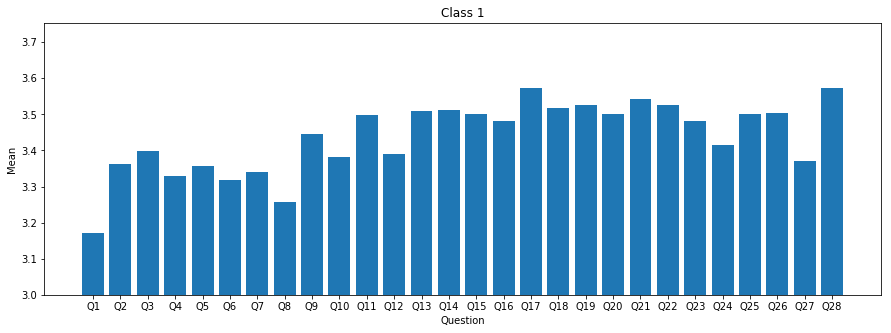

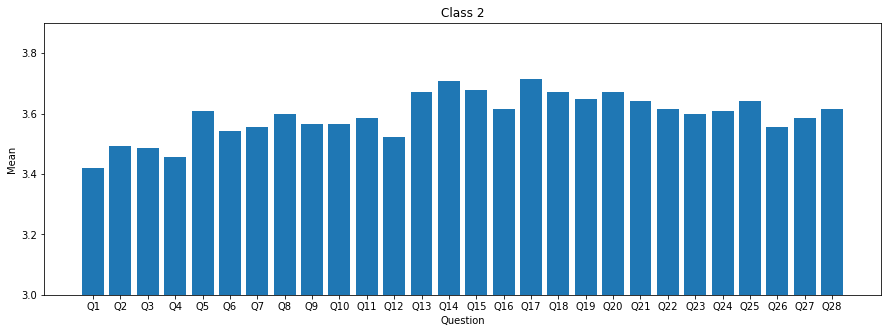

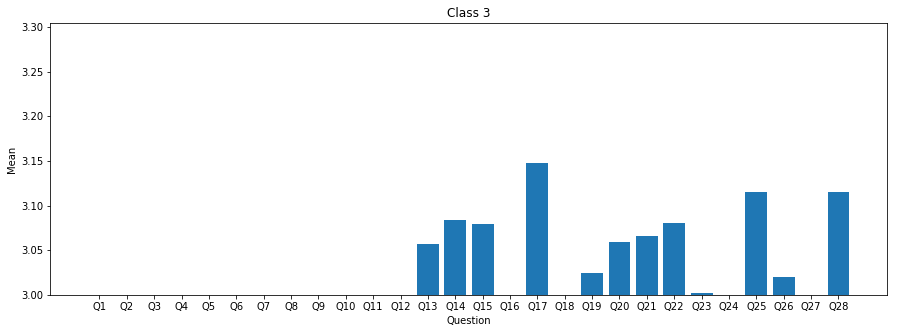

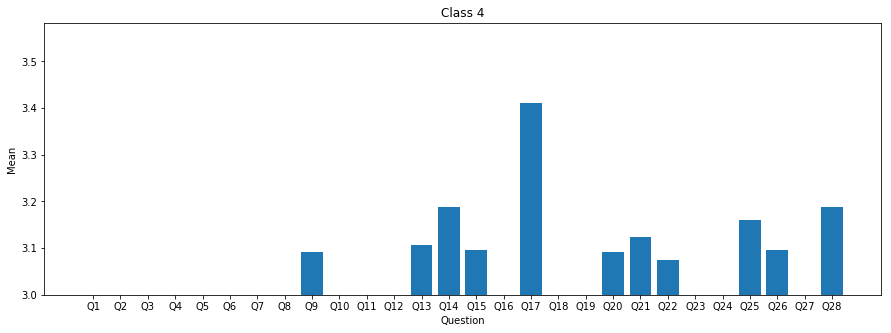

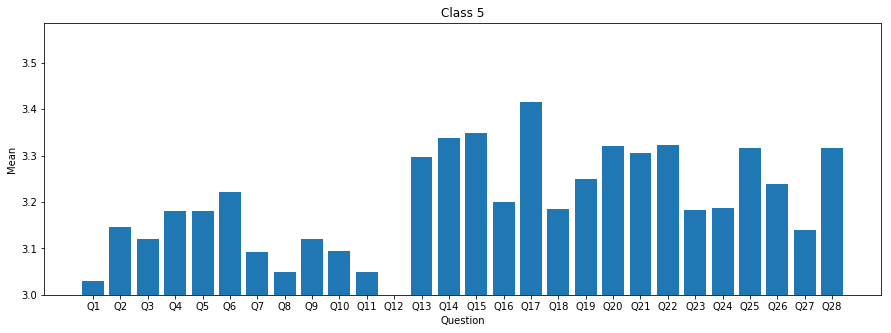

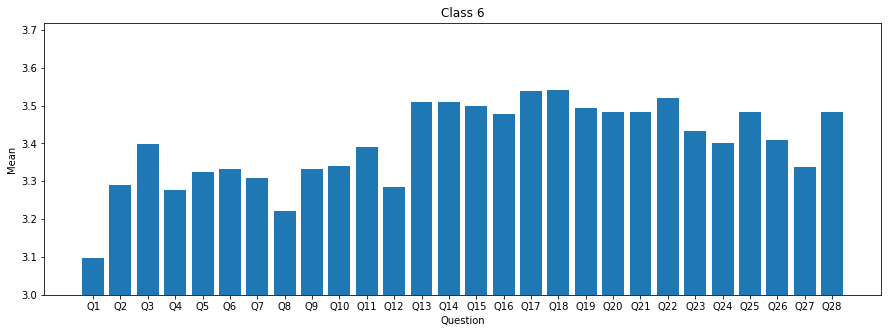

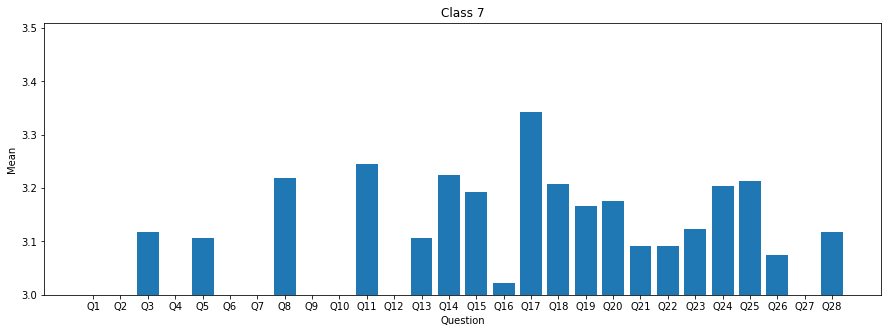

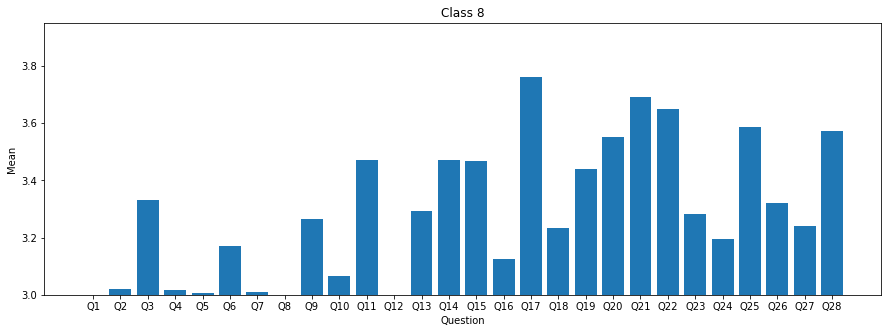

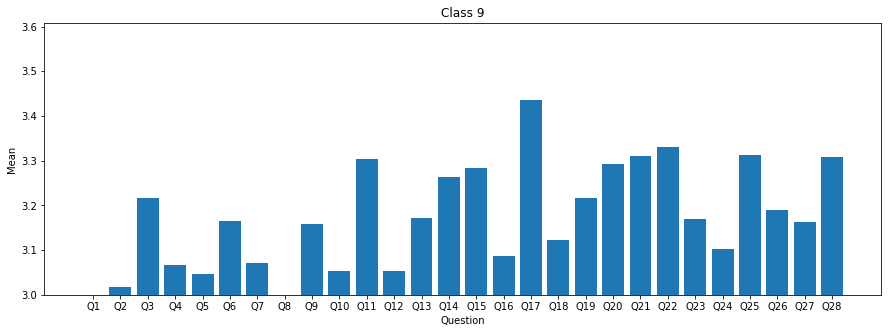

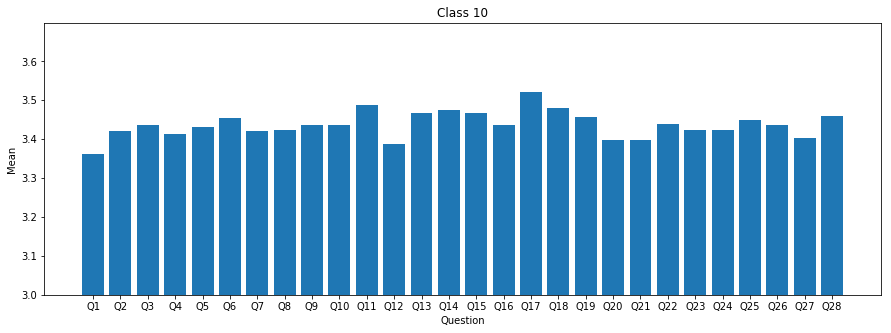

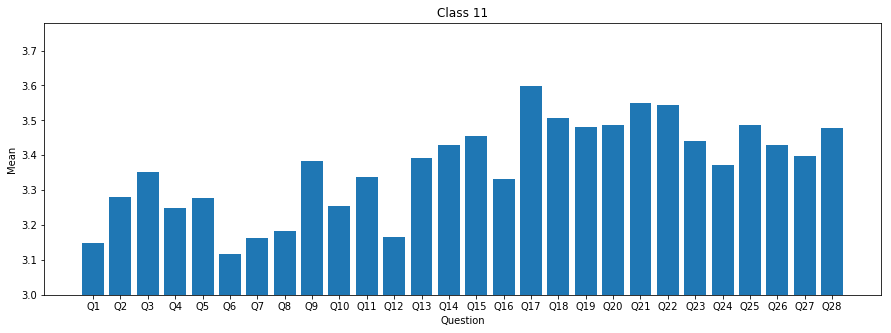

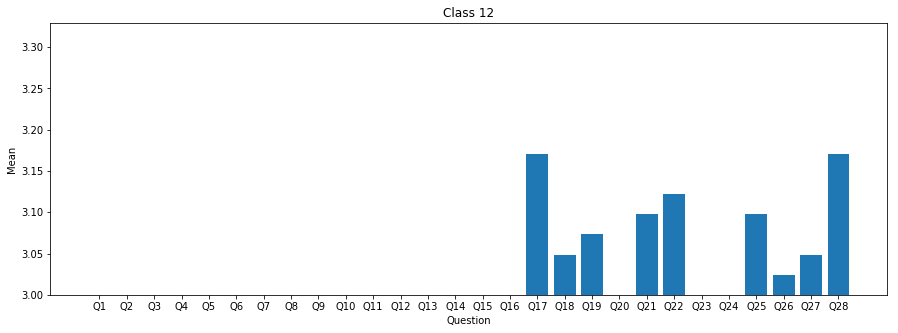

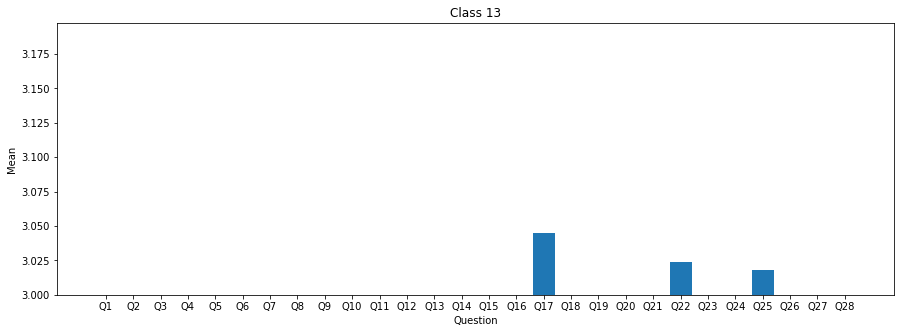

In [11]:
for i in range(1,14):
    plt.figure(figsize=(15,5))
    plt.bar(question,df[df['class']==i][question].describe().loc['mean',:])
    plt.xlabel('Question')
    plt.ylabel('Mean')
    plt.ylim(3.0,)
    plt.title('Class '+str(i))
    plt.show()
    
# class 3,4,12,13 need to improve the class

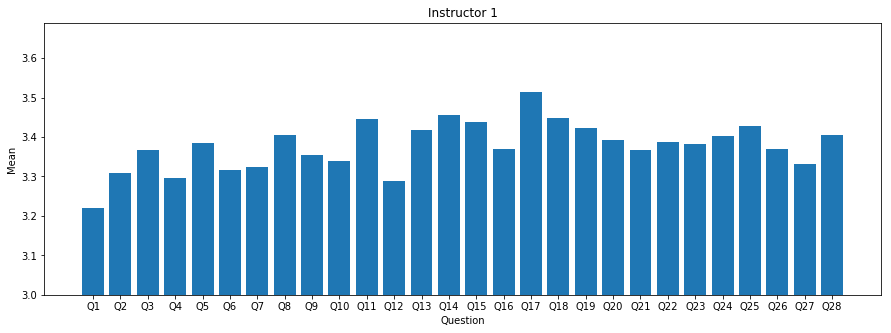

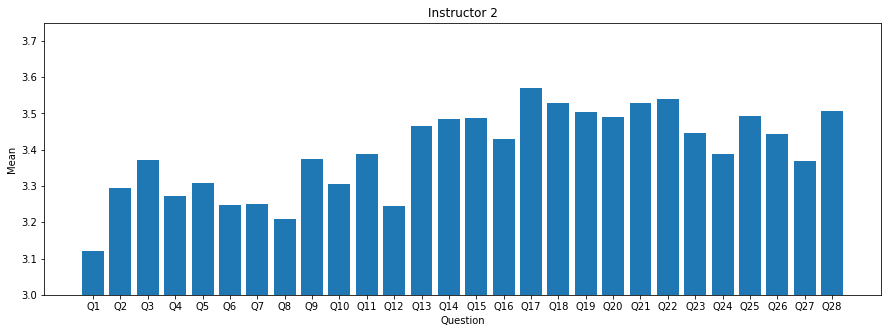

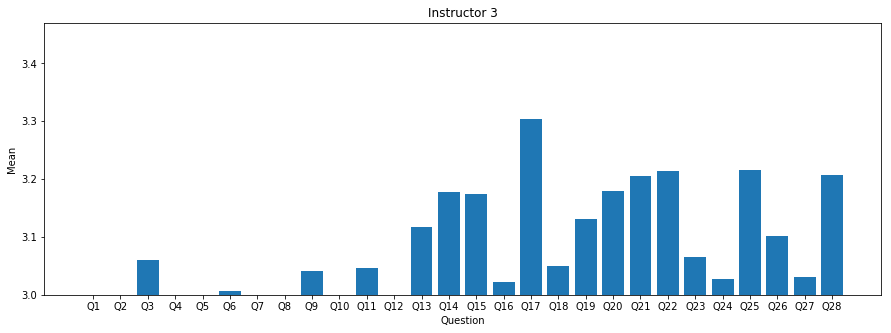

In [12]:
for i in range(1,4):
    plt.figure(figsize=(15,5))
    plt.bar(question,df[df['instr']==i][question].describe().loc['mean',:])
    plt.xlabel('Question')
    plt.ylabel('Mean')
    plt.ylim(3.0,)
    plt.title('Instructor No'+str(i))
    plt.show()

# Instructor No. 3 needs to improve more

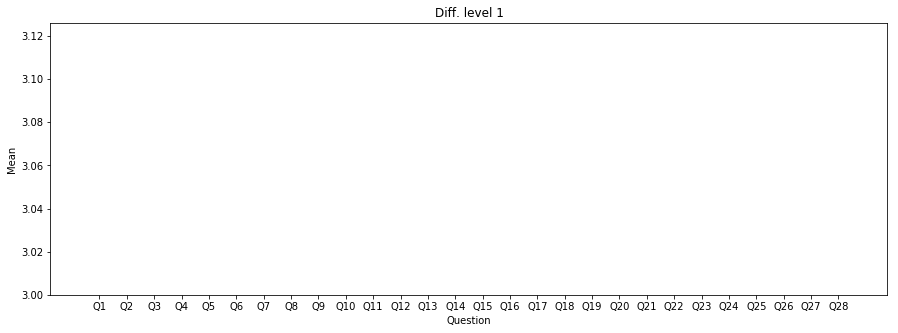

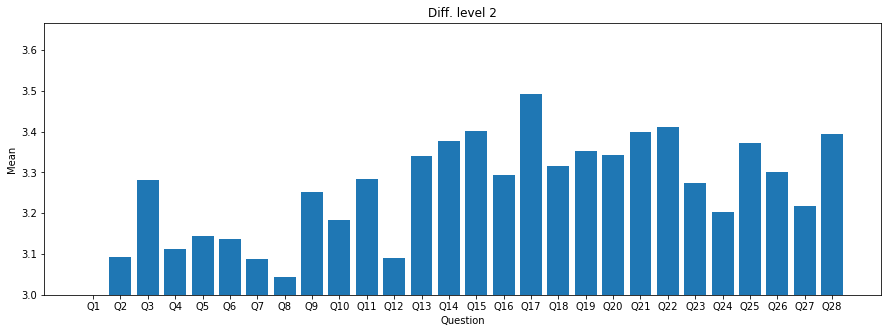

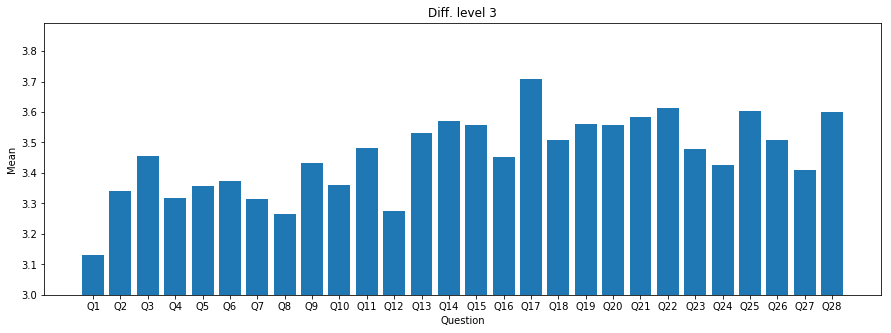

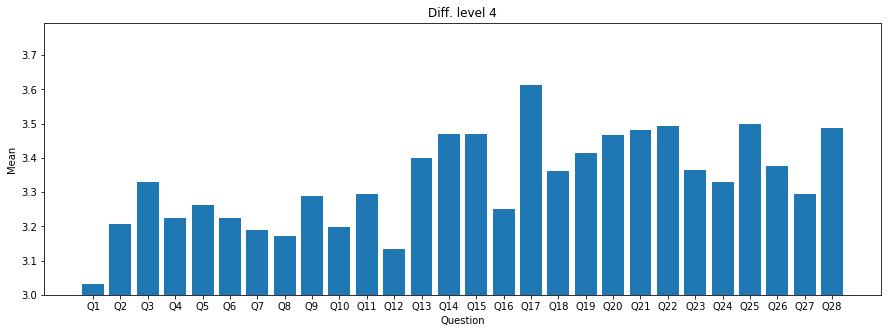

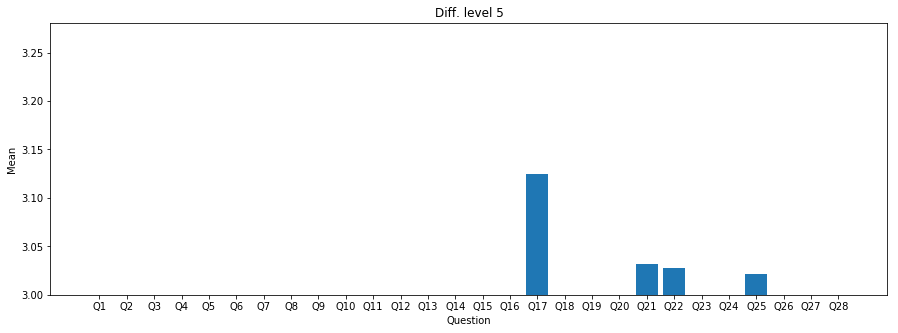

In [13]:
for i in range(1,6):
    plt.figure(figsize=(15,5))
    plt.bar(question,df[df['difficulty']==i][question].describe().loc['mean',:])
    plt.xlabel('Question')
    plt.ylabel('Mean')
    plt.ylim(3.0,)
    plt.title('Difficulty level '+str(i))
    plt.show()

# The student, that perceive very easy or very hard each class, evaluates low score each question

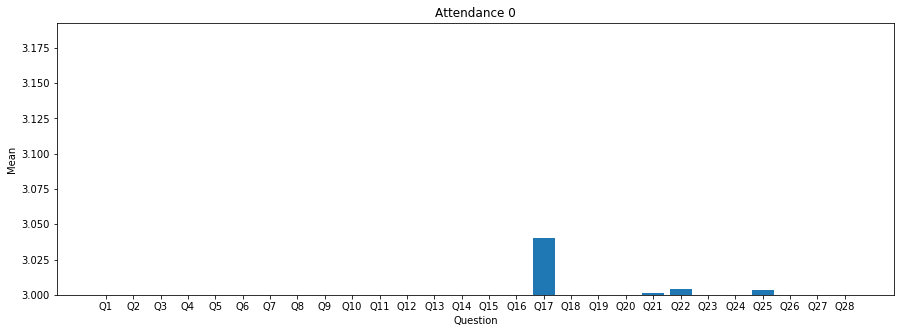

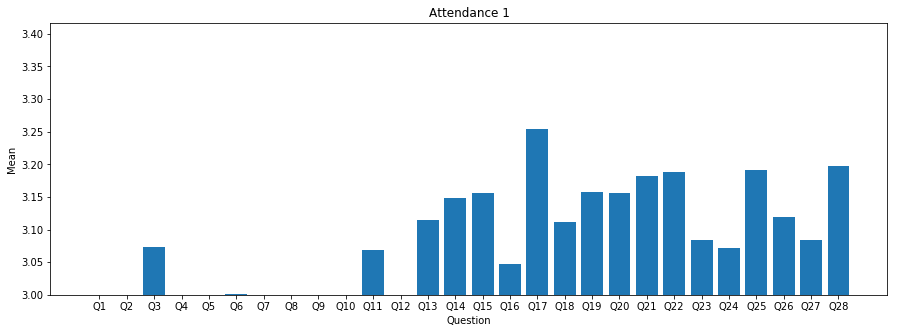

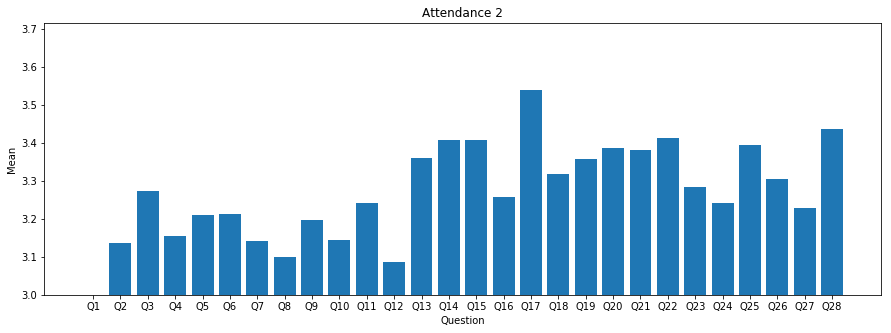

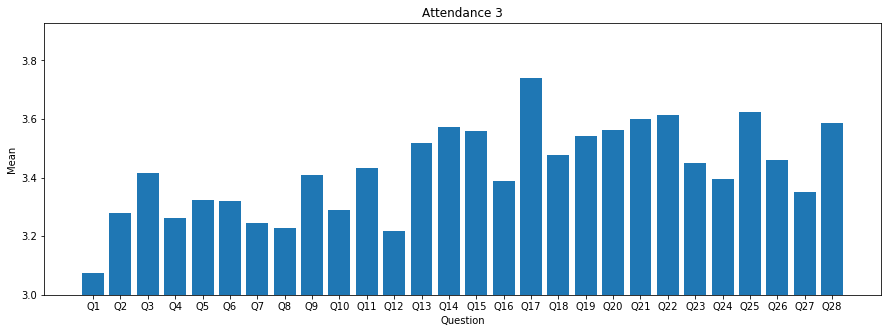

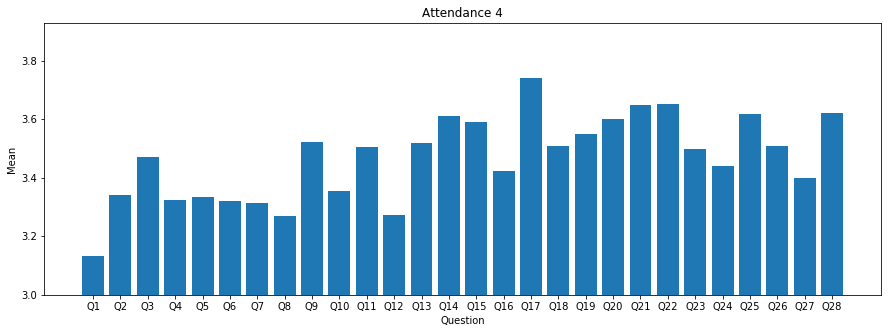

In [28]:
for i in range(5):
    plt.figure(figsize=(15,5))
    plt.bar(question,df[df['attendance']==i][question].describe().loc['mean',:])
    plt.xlabel('Question')
    plt.ylabel('Mean')
    plt.ylim(3.0,)
    plt.title('Attendance '+str(i))
    plt.show()

# The student, that barely attend the class, evaluates low score each question

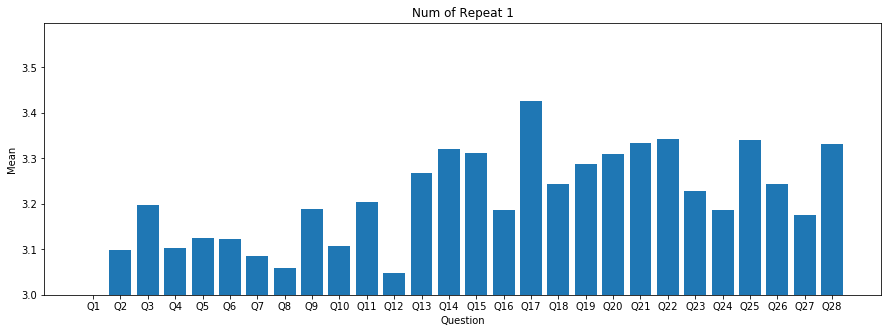

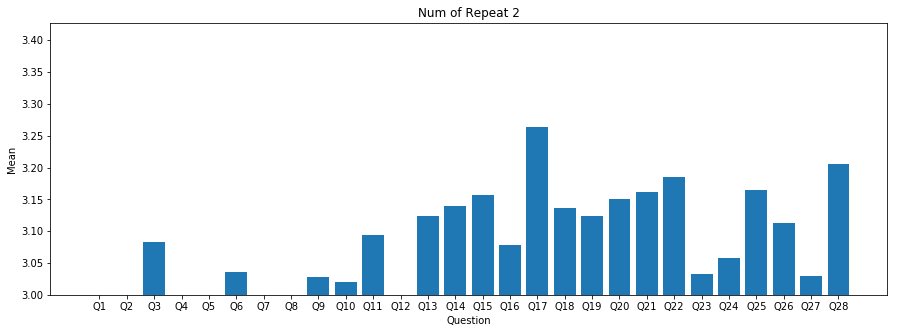

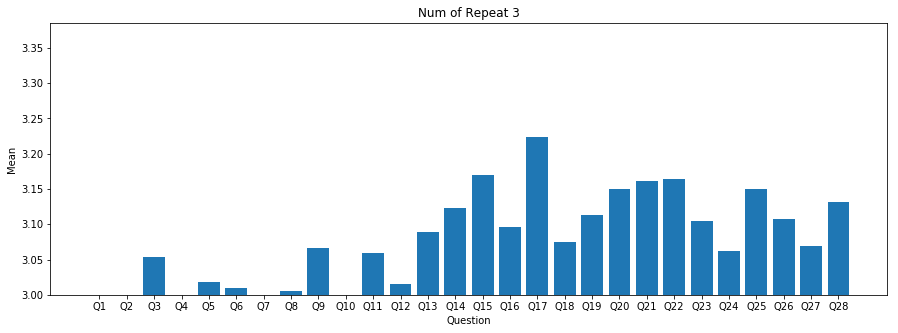

In [31]:
for i in range(1,4):
    plt.figure(figsize=(15,5))
    plt.bar(question,df[df['nb.repeat']==i][question].describe().loc['mean',:])
    plt.xlabel('Question')
    plt.ylabel('Mean')
    plt.ylim(3.0,)
    plt.title('Num of Repeat '+str(i))
    plt.show()

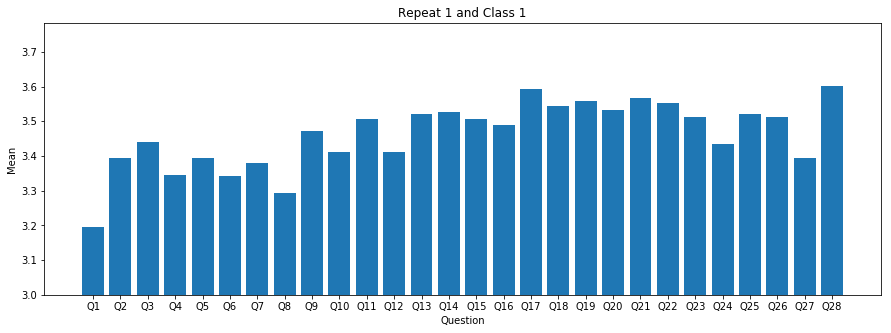

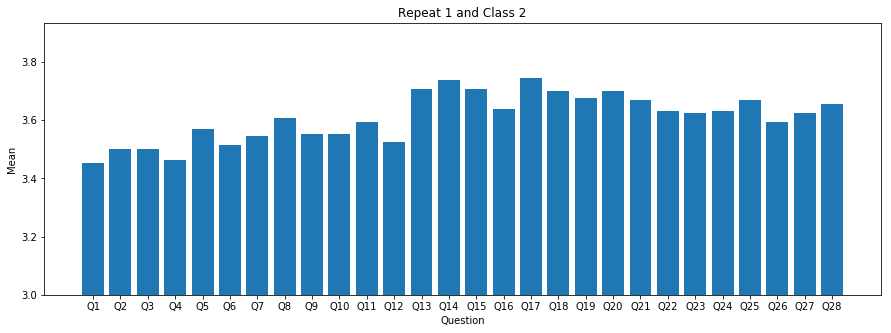

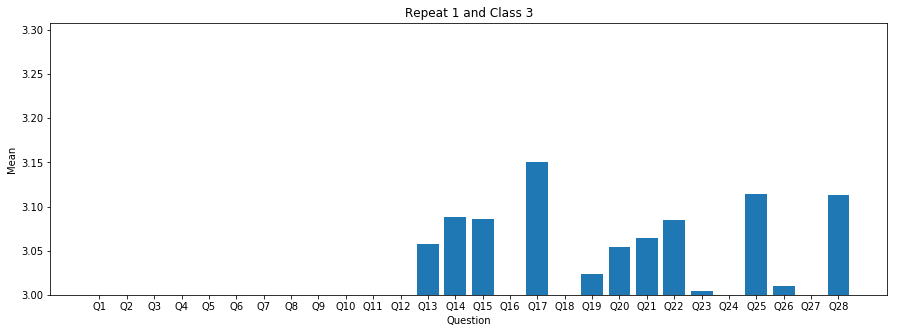

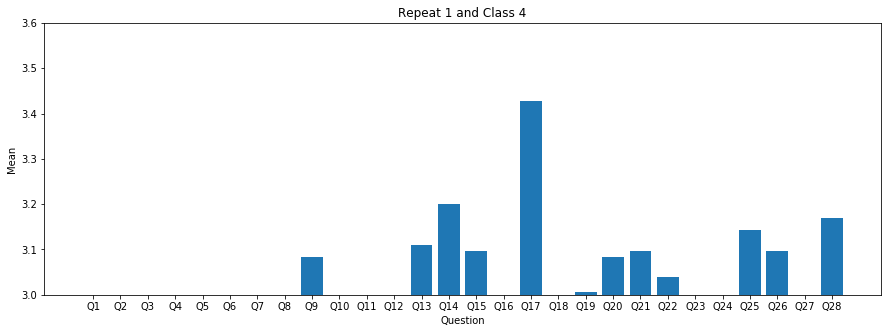

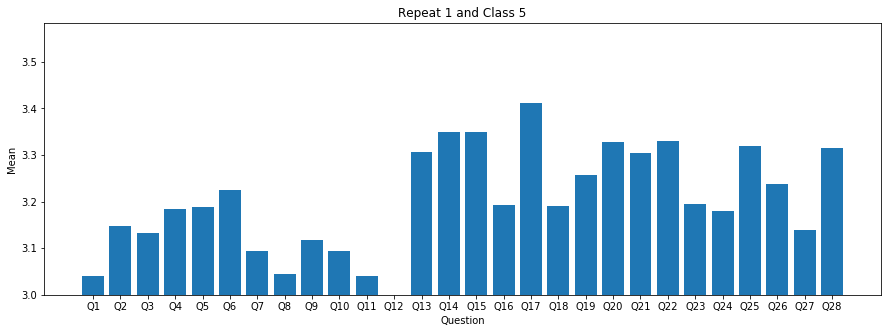

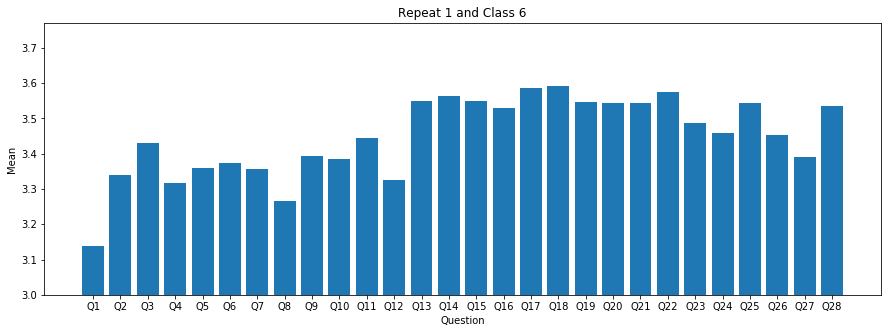

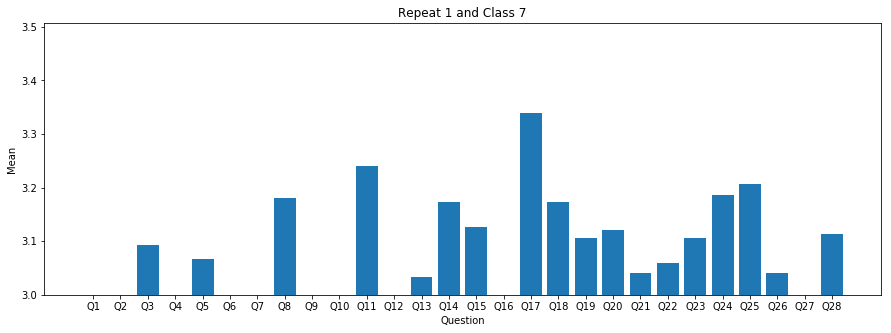

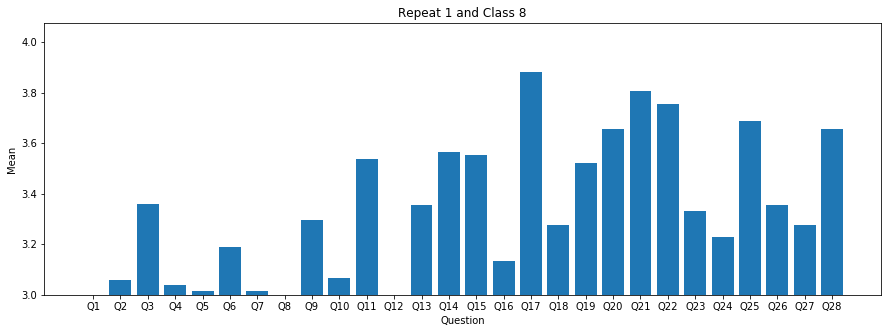

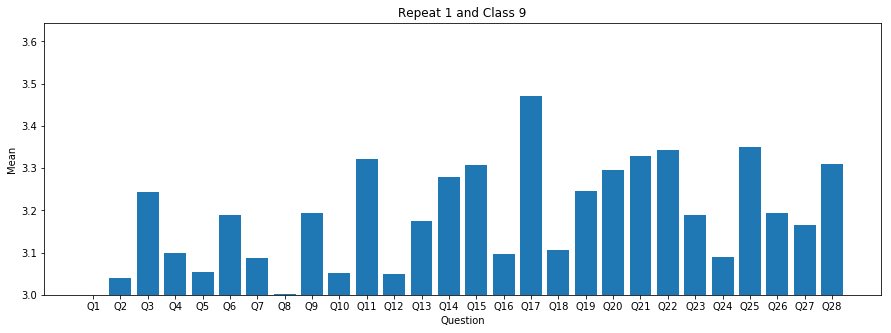

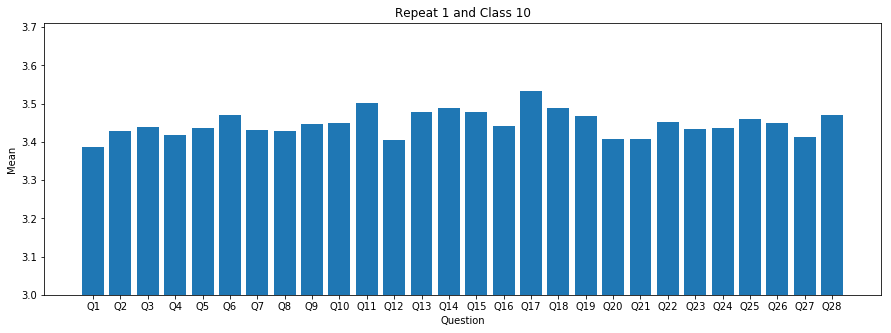

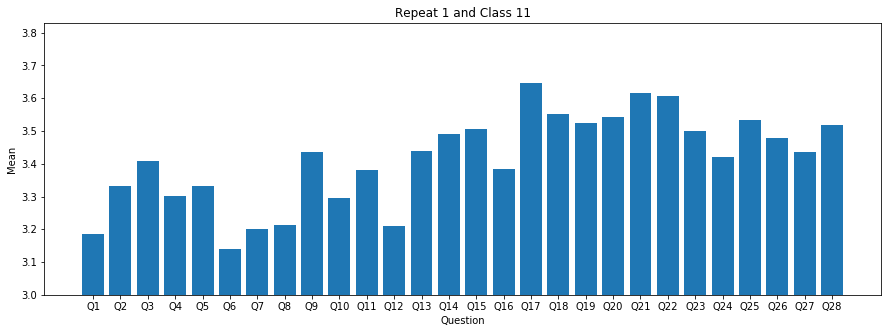

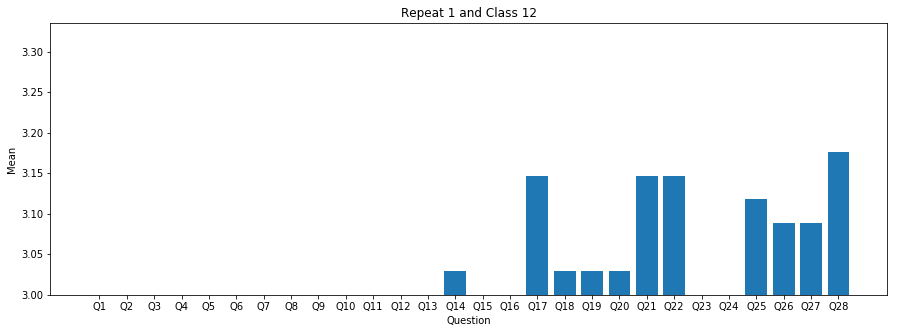

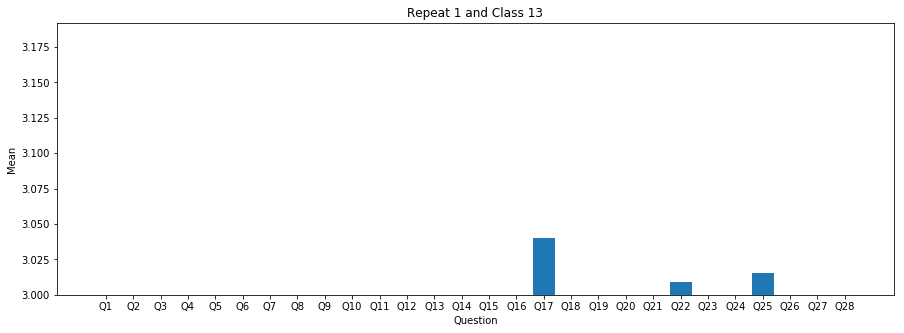

In [16]:
for i in range(1,14):
    plt.figure(figsize=(15,5))
    plt.bar(question,df[(df['nb.repeat']==1) & (df['class']==i)][question].describe().loc['mean',:])
    plt.xlabel('Question')
    plt.ylabel('Mean')
    plt.ylim(3.0,)
    plt.title('Repeat 1 and Class '+str(i))
    plt.show()

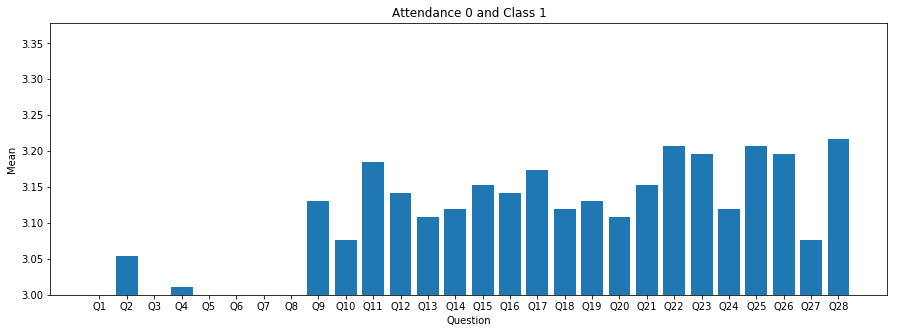

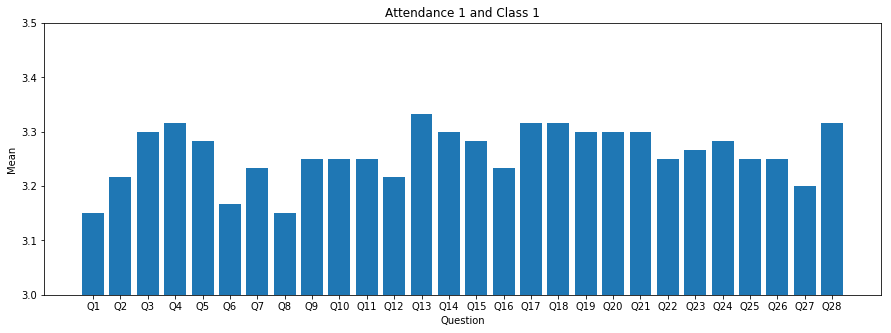

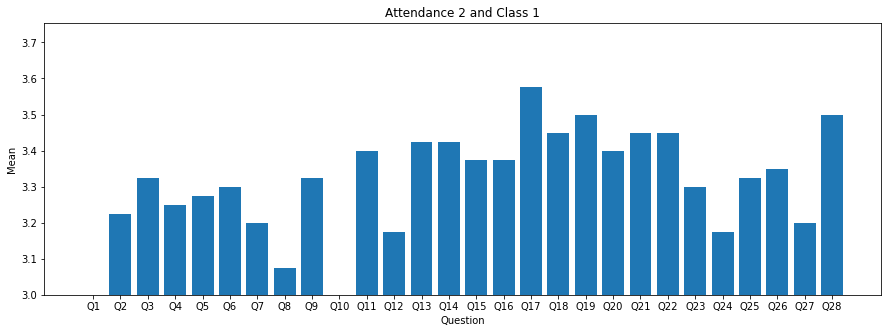

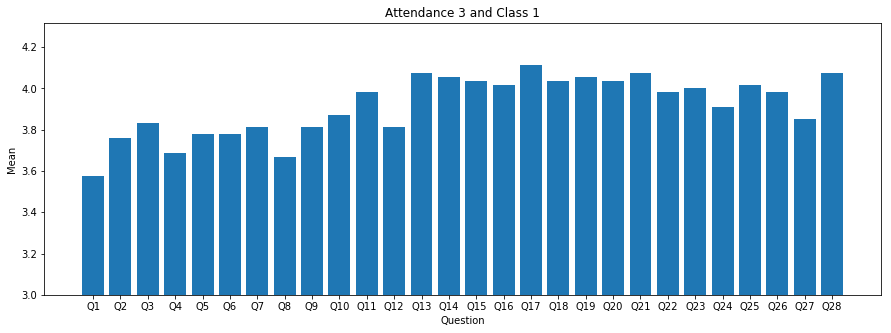

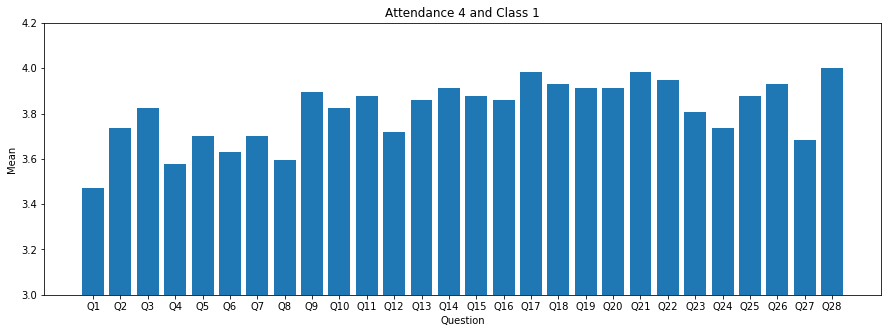

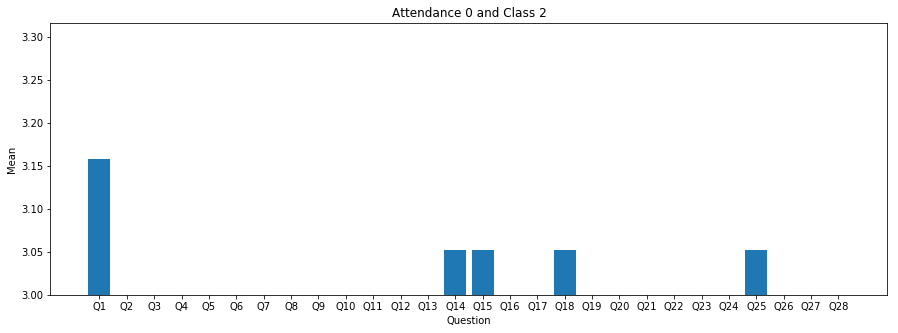

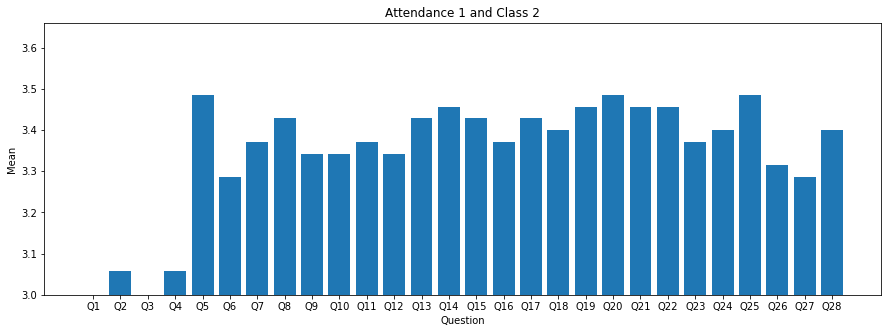

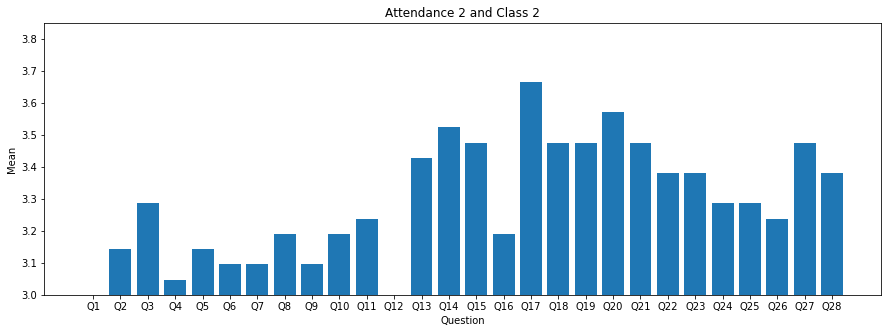

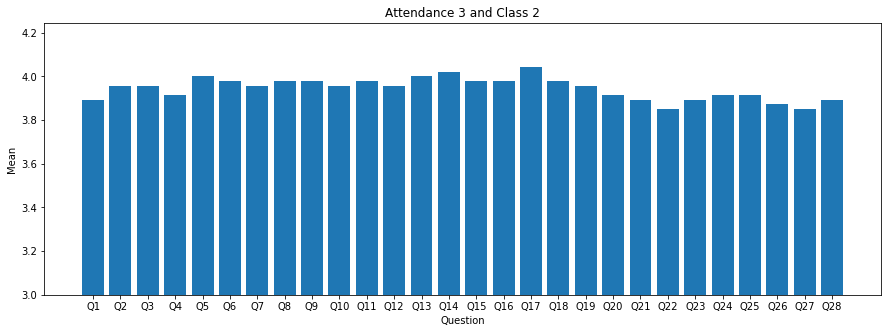

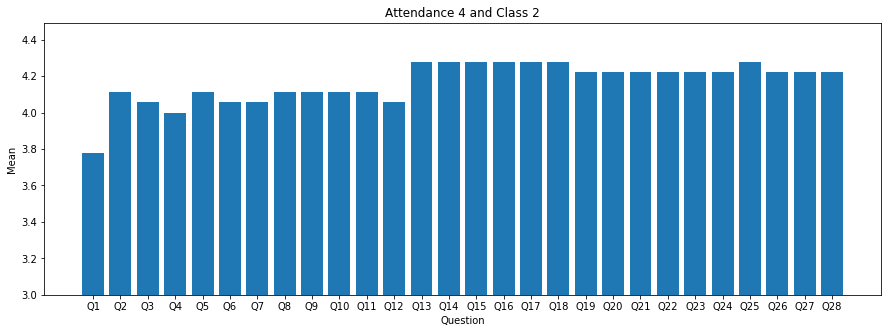

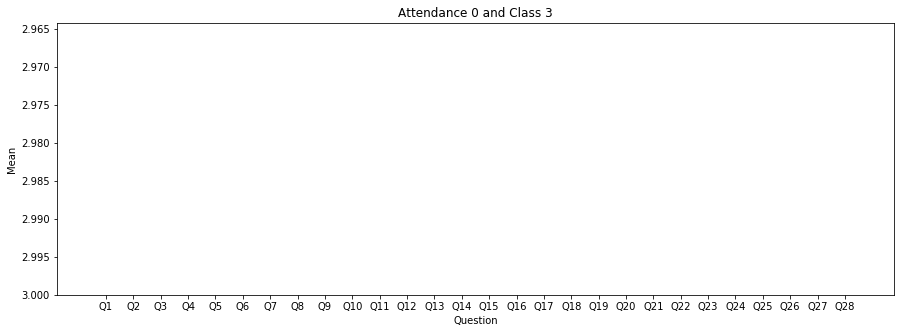

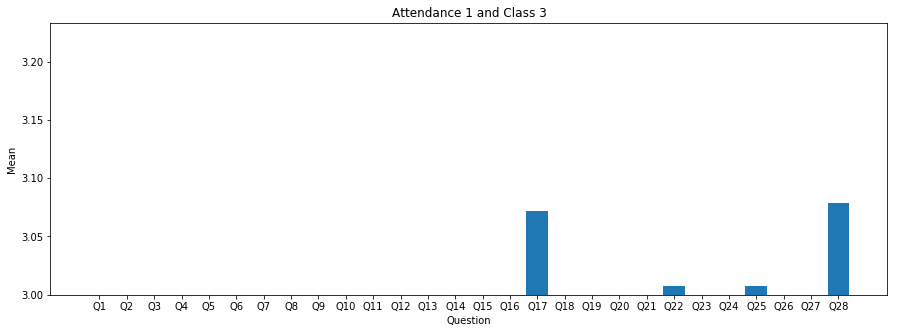

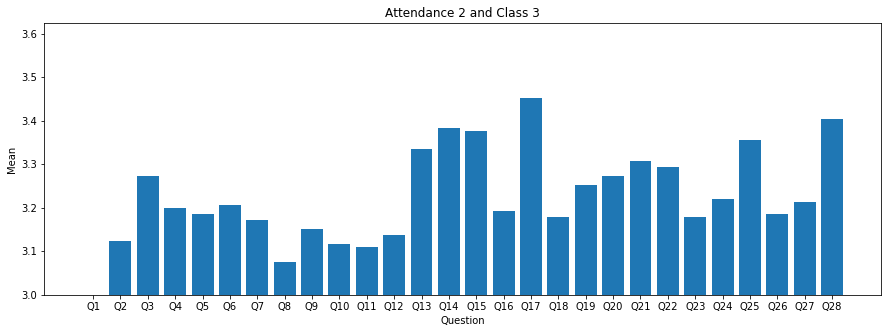

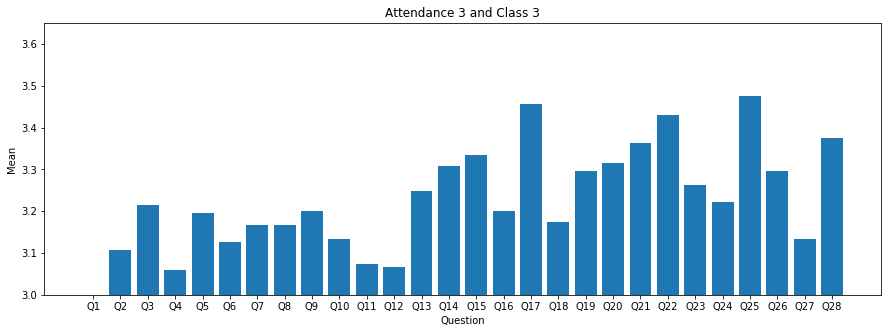

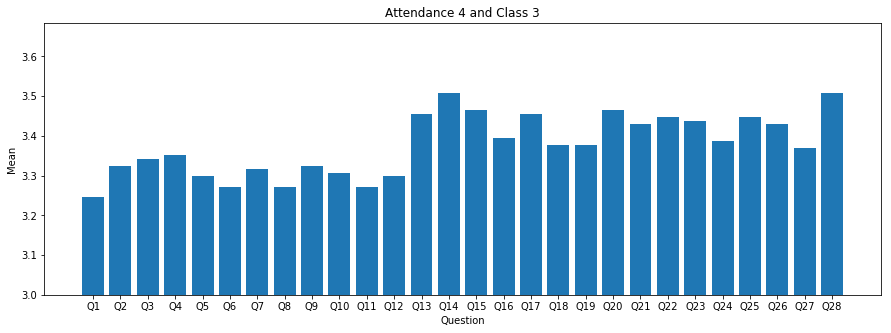

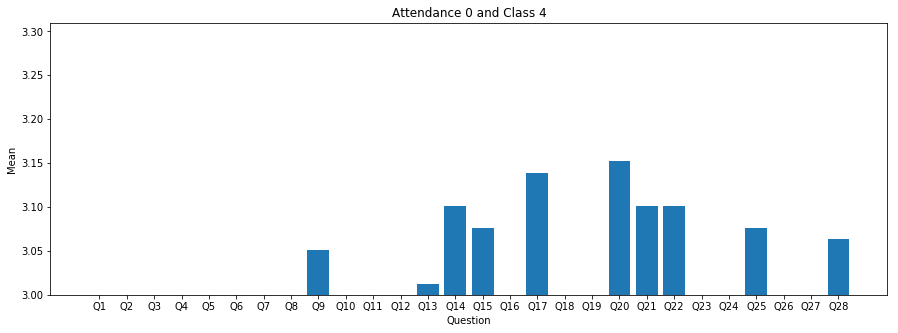

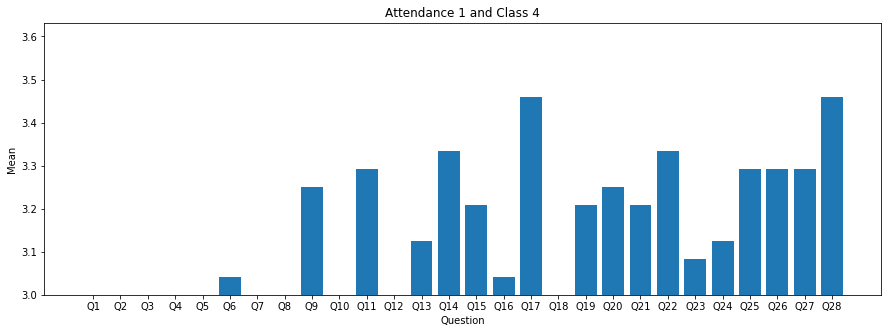

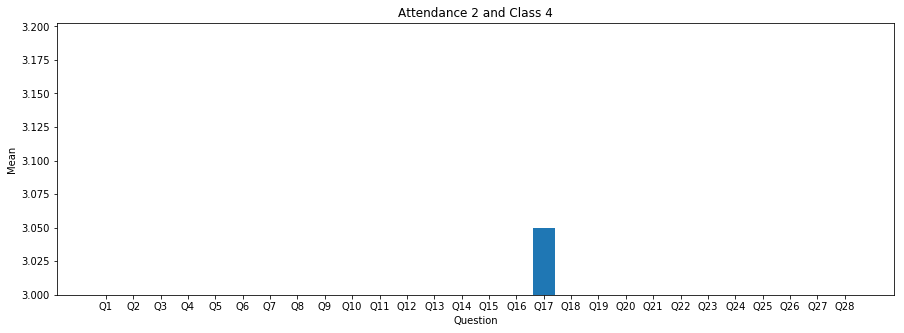

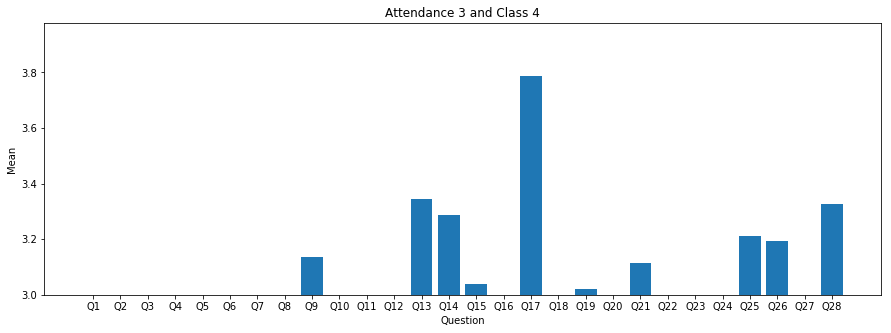

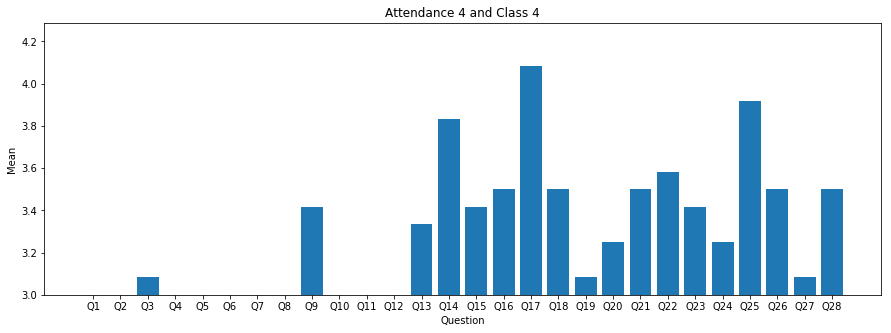

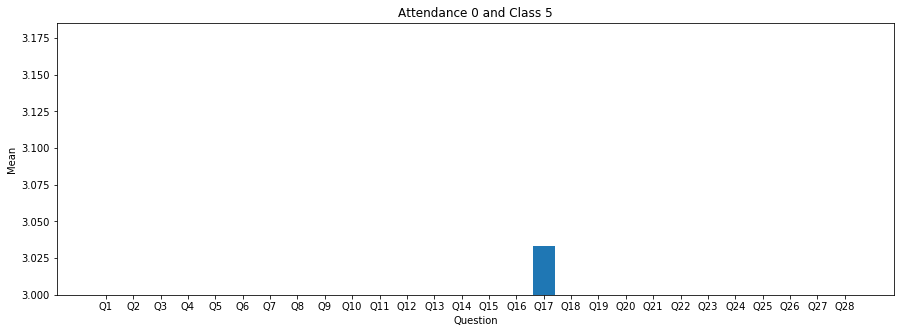

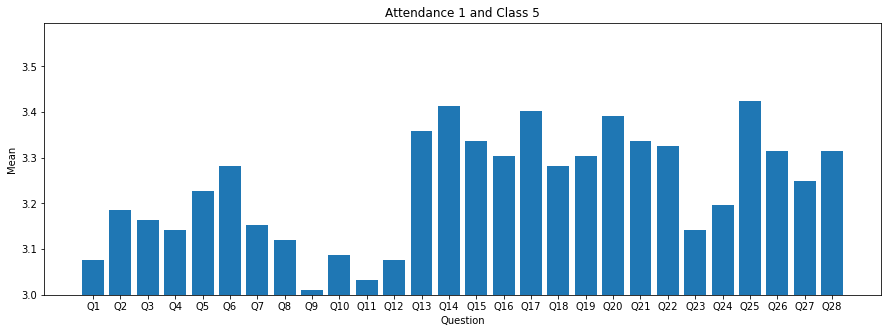

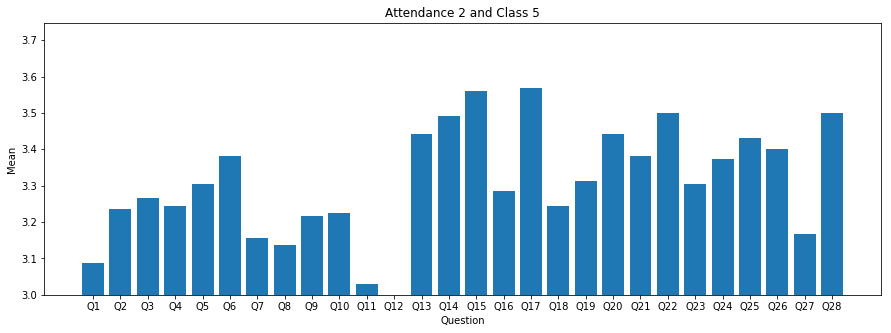

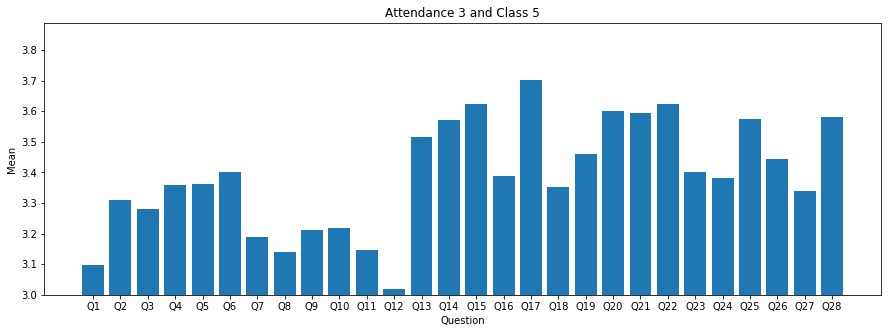

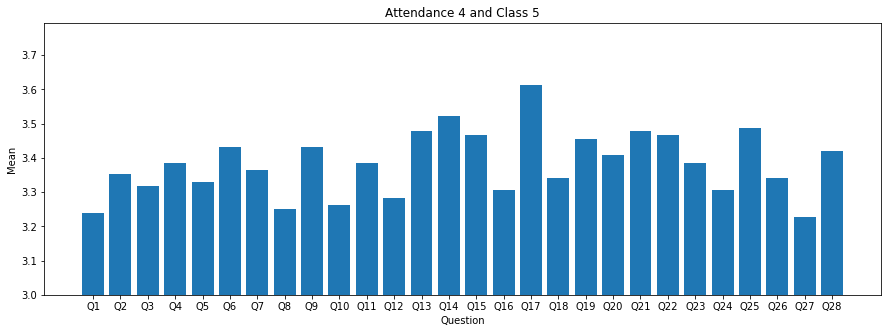

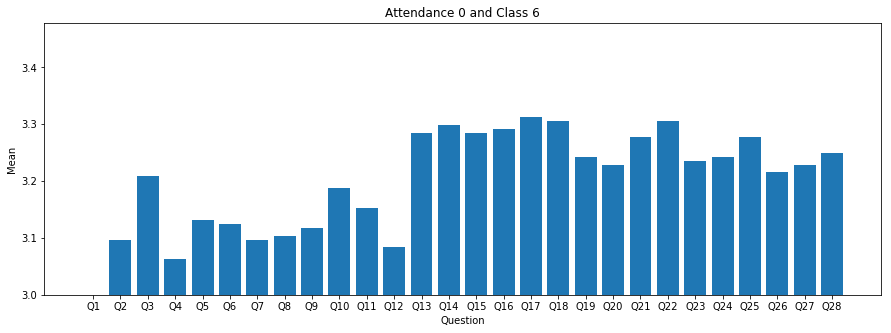

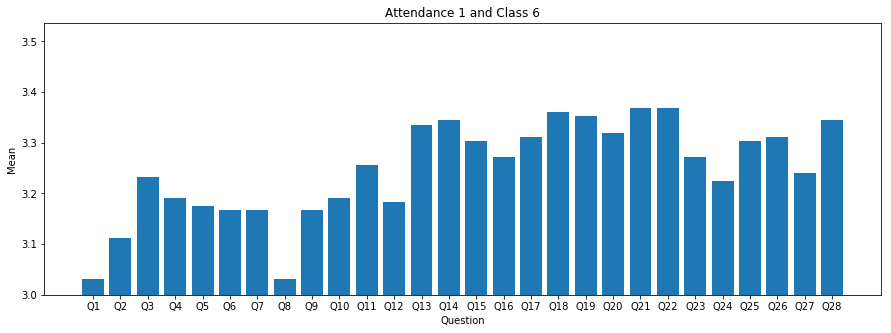

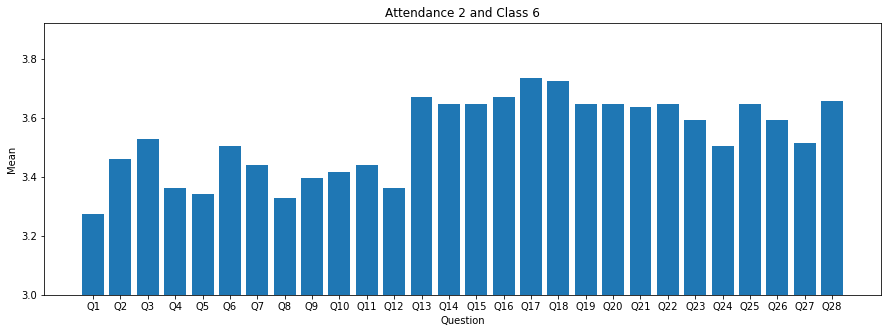

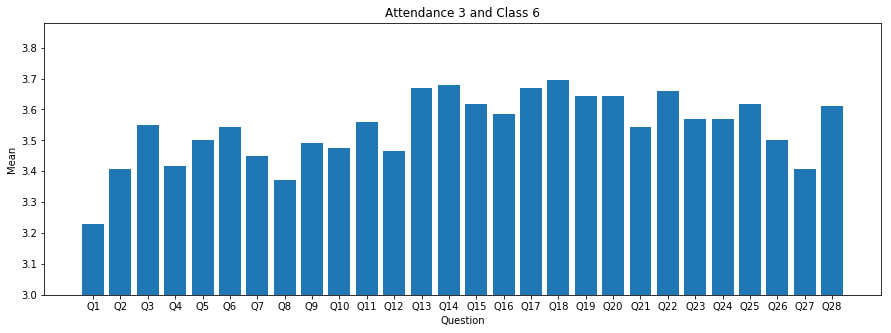

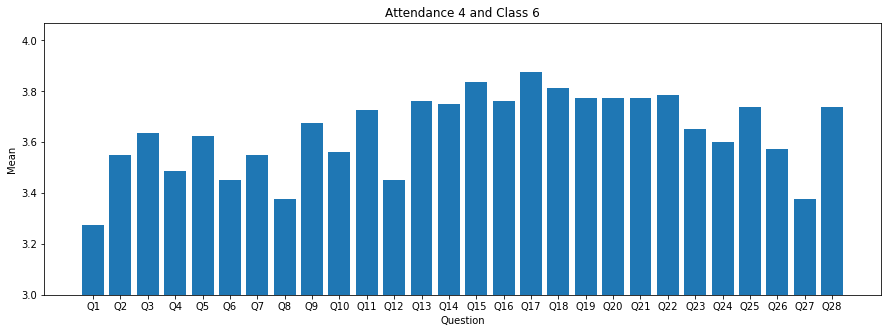

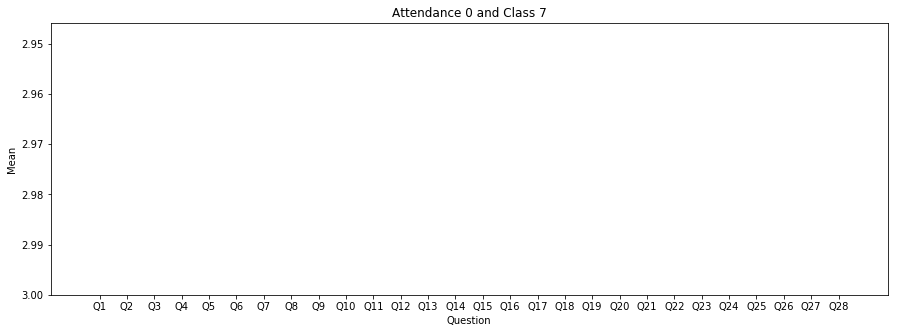

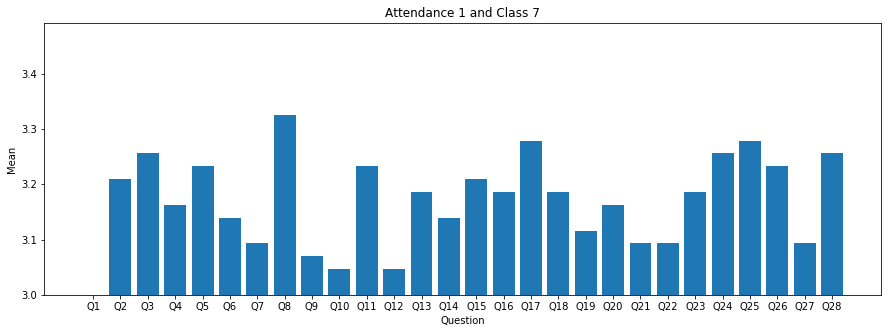

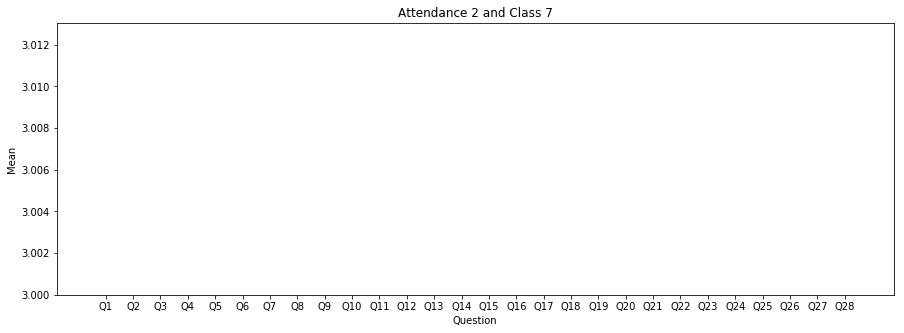

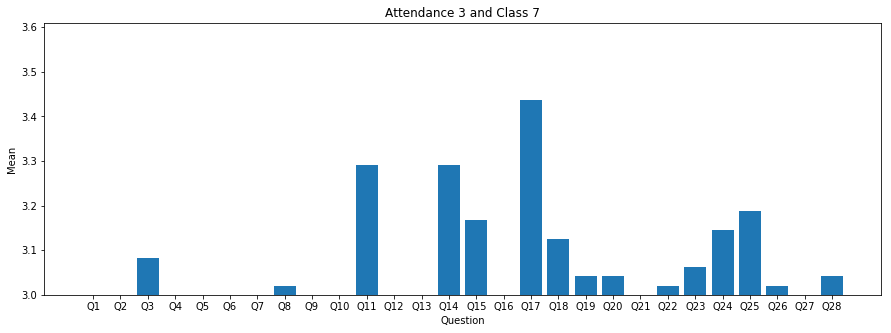

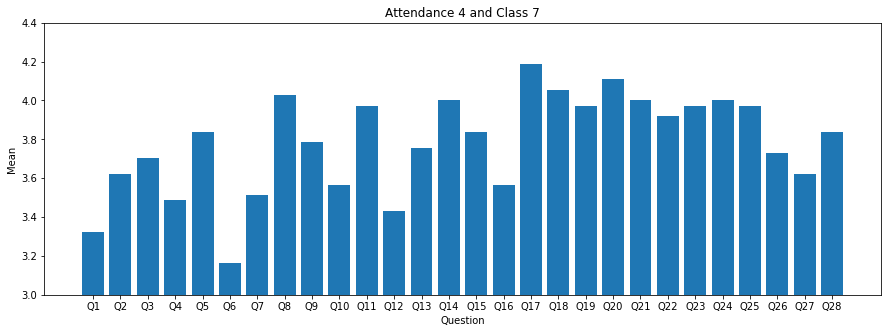

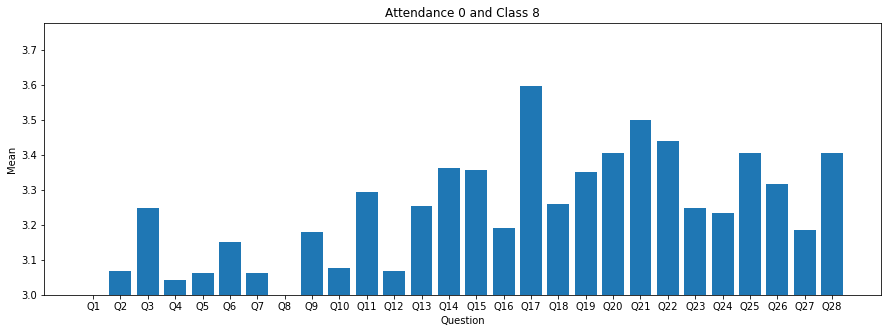

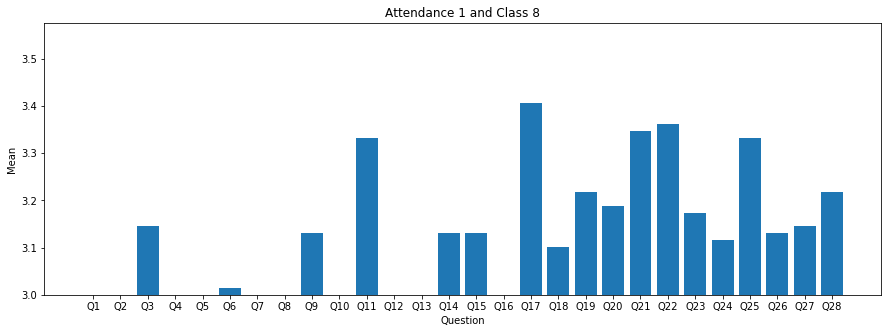

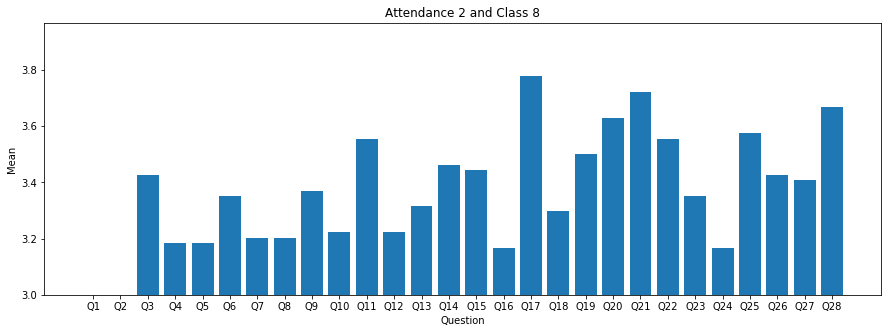

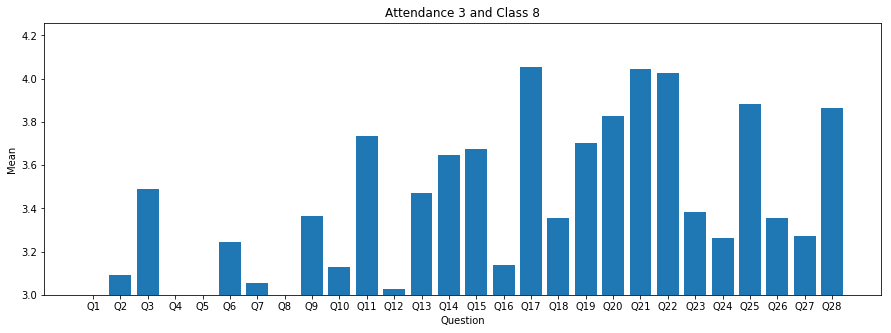

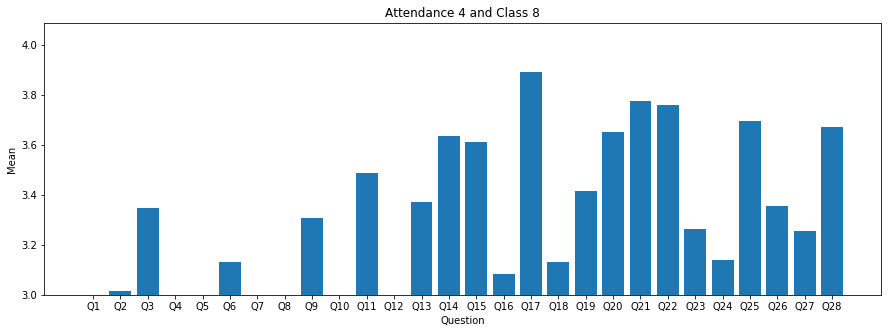

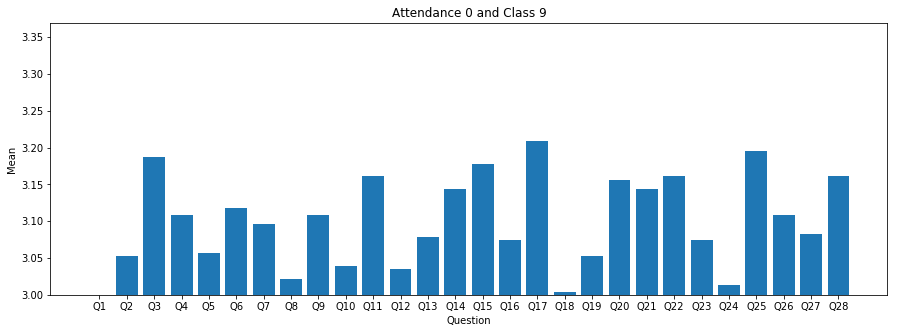

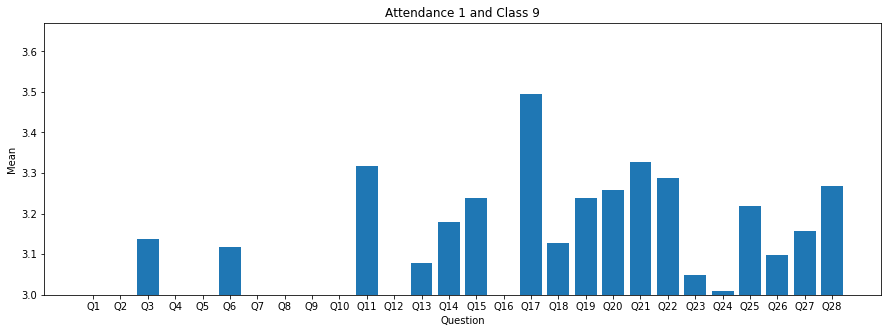

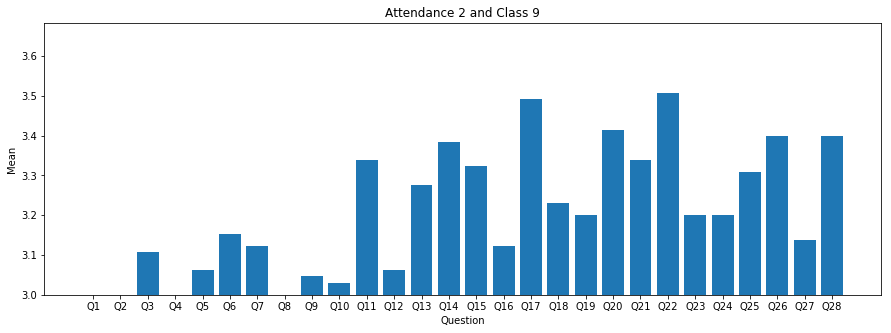

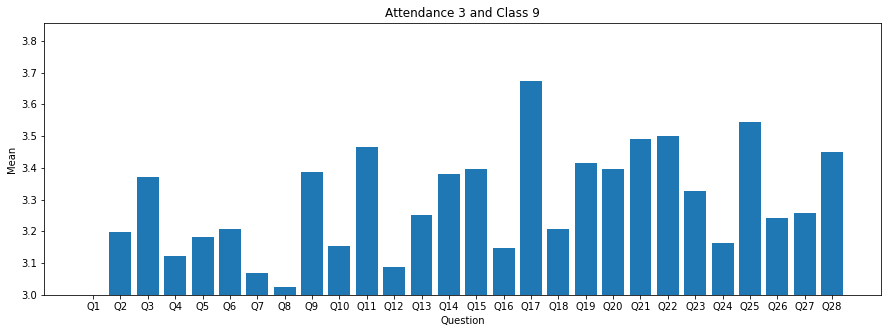

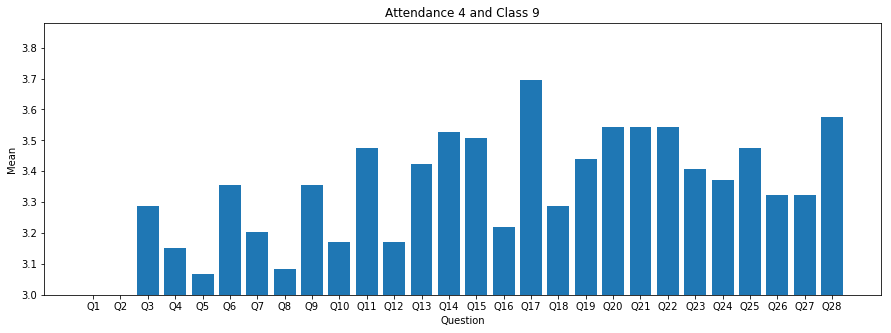

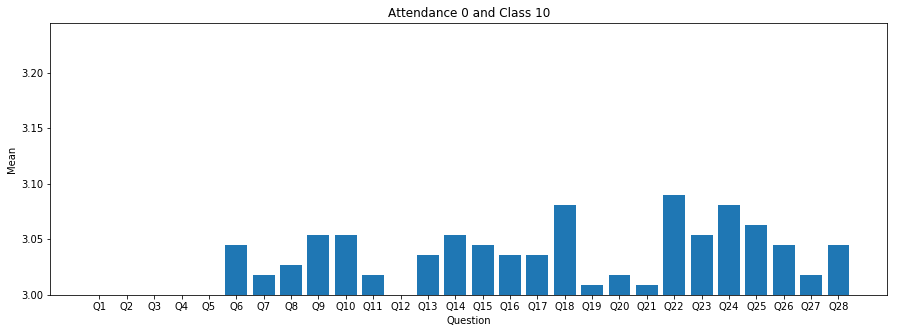

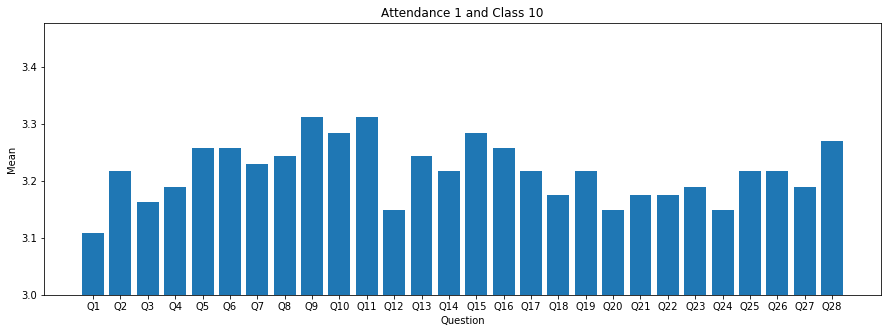

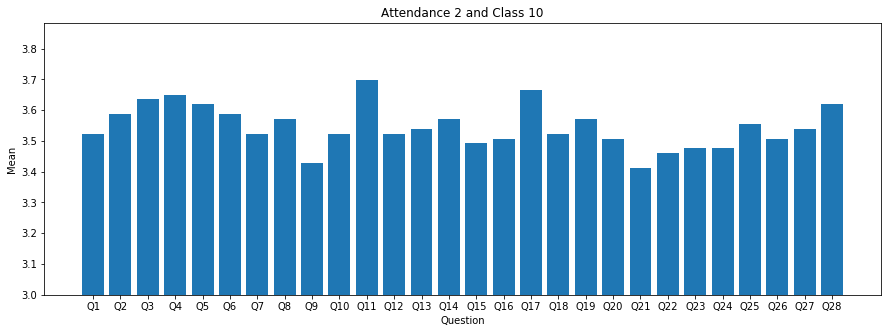

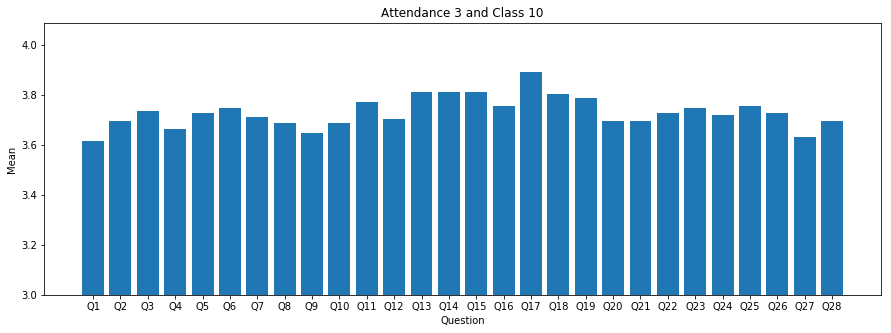

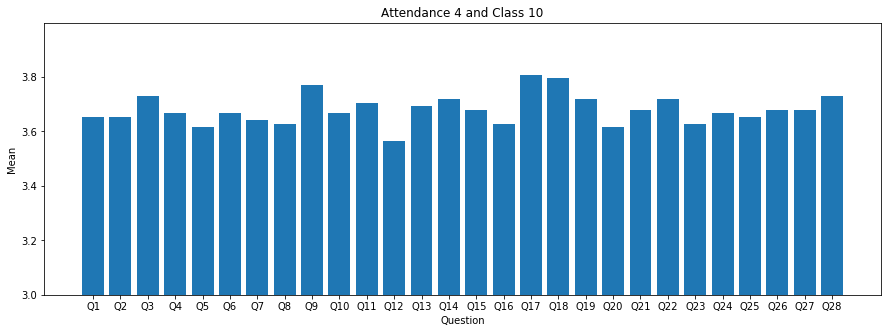

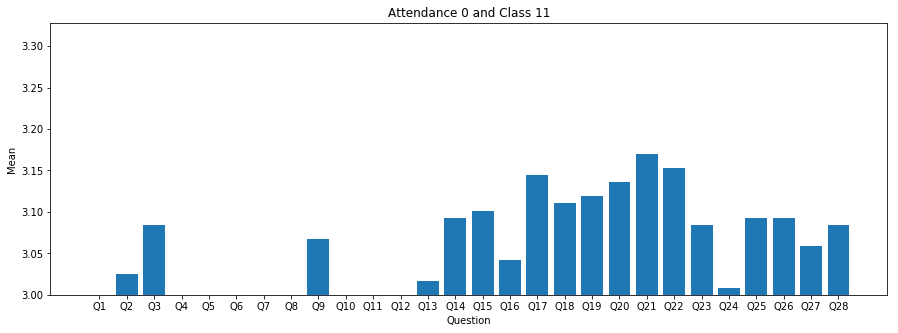

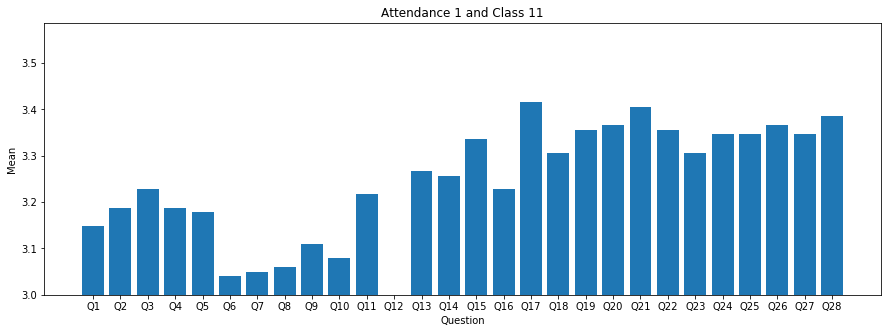

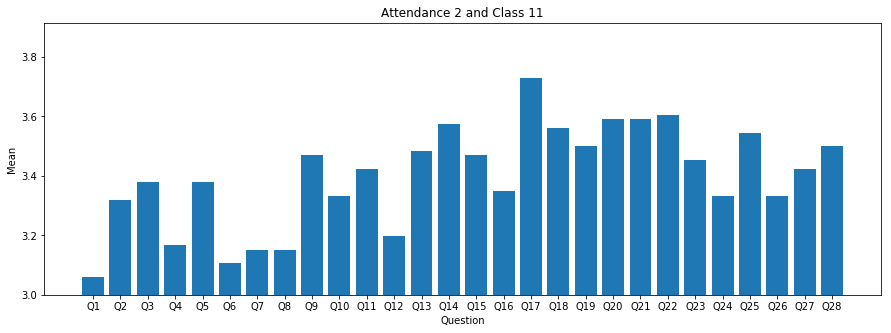

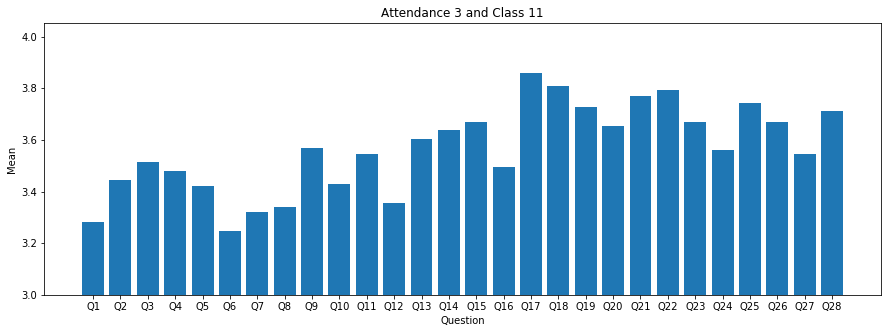

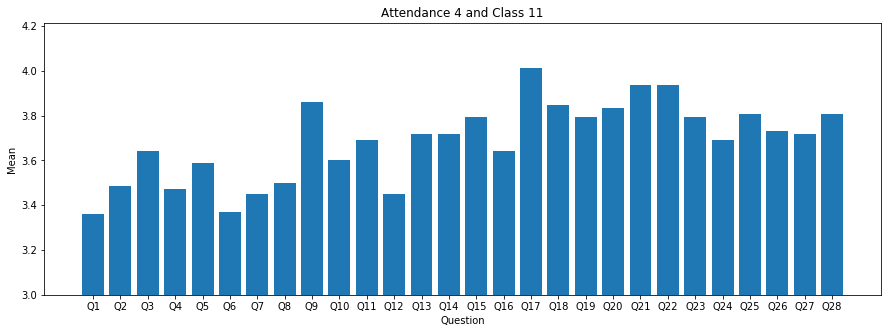

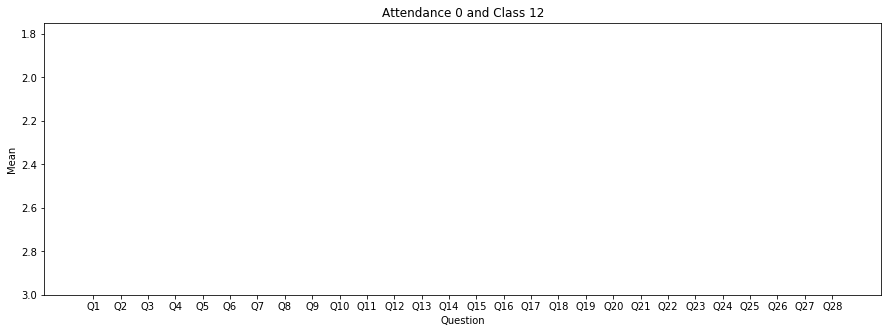

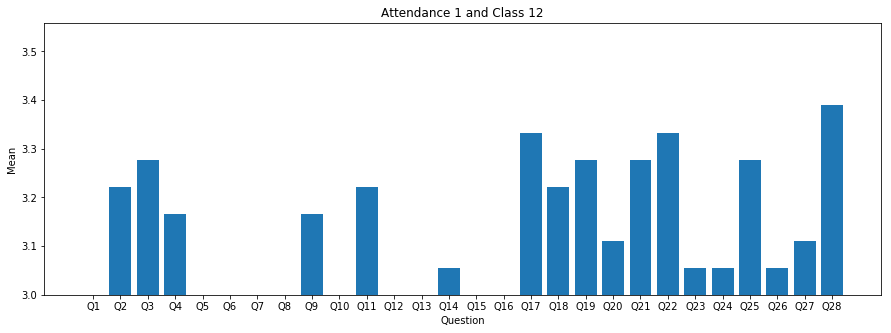

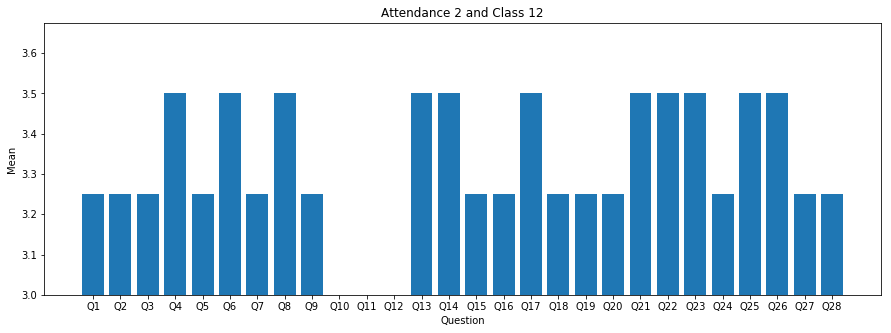

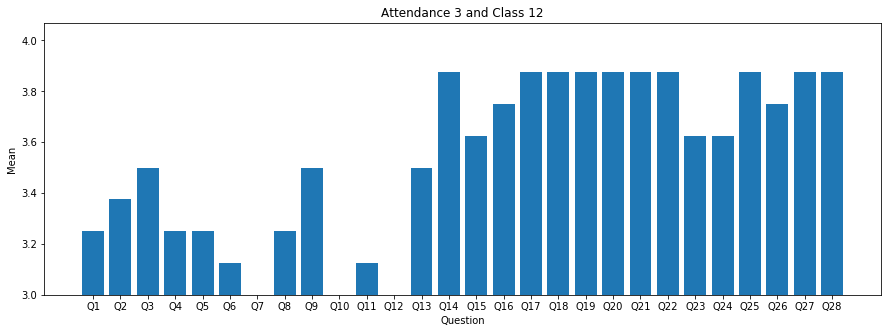

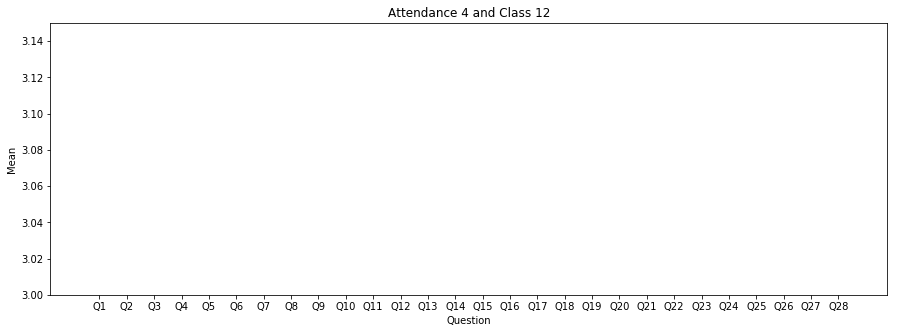

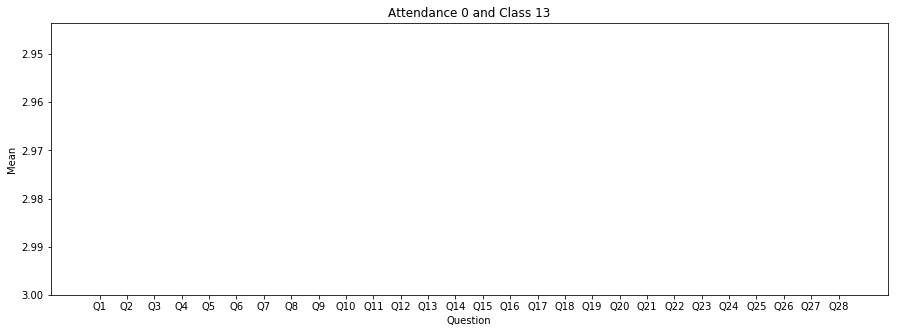

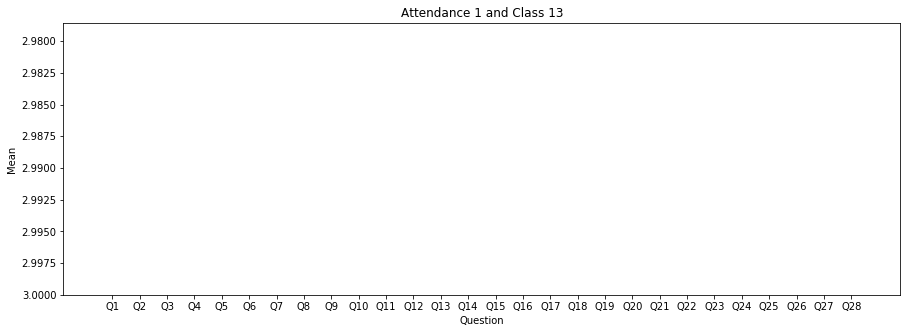

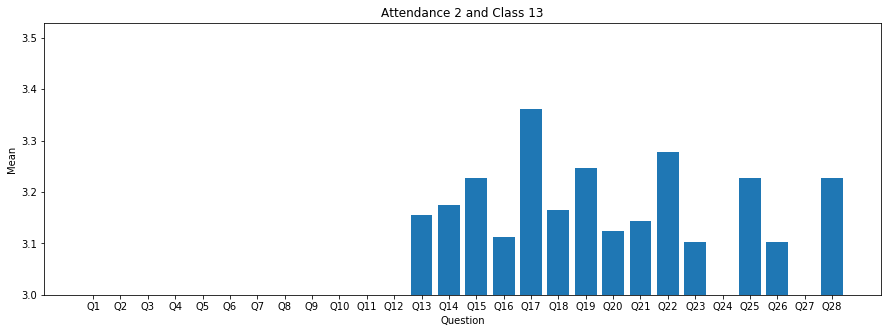

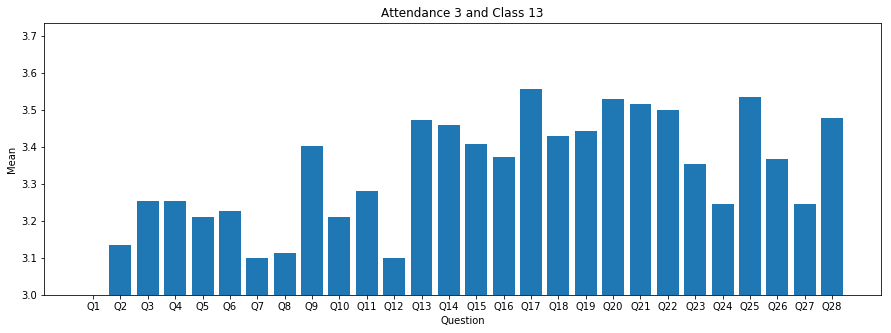

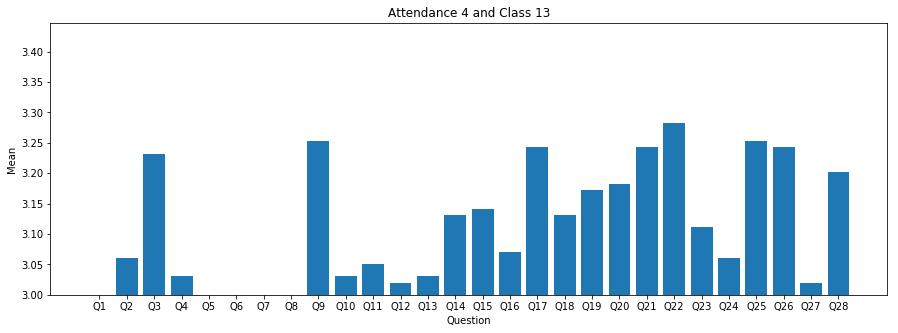

In [39]:
for i in range(1,14):
    for j in range(5):
        plt.figure(figsize=(15,5))
        plt.bar(question,df[(df['attendance']==j) & (df['class']==i)][question].describe().loc['mean',:])
        plt.xlabel('Question')
        plt.ylabel('Mean')
        plt.ylim(3.0,)
        plt.title('Attendance '+str(j)+' and Class '+str(i))
        plt.show()

In [38]:
for i in range(1,14):
    print(df[df['class']==i].groupby(['class','attendance'])['attendance'].count())
    print('='*30)

class  attendance
1      0             92
       1             60
       2             40
       3             54
       4             57
Name: attendance, dtype: int64
class  attendance
2      0             19
       1             35
       2             21
       3             47
       4             18
Name: attendance, dtype: int64
class  attendance
3      0             356
       1             139
       2             146
       3             149
       4             114
Name: attendance, dtype: int64
class  attendance
4      0             79
       1             24
       2             20
       3             52
       4             12
Name: attendance, dtype: int64
class  attendance
5      0             209
       1              92
       2             102
       3             165
       4              88
Name: attendance, dtype: int64
class  attendance
6      0             144
       1             125
       2              91
       3             118
       4              80
Na